#### Basic Sequencing Functions

In [37]:
def reverseComplement(s):
    complement = {'A':'T','G':'C','C':'G','T':'A','N':'N'}
    out = ''
    for base in s:
        out =  complement[base] + out
    return out
    

In [38]:
reverseComplement('ACGTAACCCTGGA')

'TCCAGGGTTACGT'

In [3]:
def longestCommonPrefix(s1,s2):
    i = 0
    while i < len(s1) and i < len(s2) and s1[i] == s2[i]:
        i += 1
    
    return s1[:i]


#### Getting Enterobacteria phage lambda Genome

In [4]:
!wget http://d28rh4a8wq0iu5.cloudfront.net/ads1/data/lambda_virus.fa

--2022-02-02 01:25:52--  http://d28rh4a8wq0iu5.cloudfront.net/ads1/data/lambda_virus.fa
Resolving d28rh4a8wq0iu5.cloudfront.net (d28rh4a8wq0iu5.cloudfront.net)... 54.230.222.64, 54.230.222.194, 54.230.222.21, ...
Connecting to d28rh4a8wq0iu5.cloudfront.net (d28rh4a8wq0iu5.cloudfront.net)|54.230.222.64|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 49270 (48K) [application/octet-stream]
Saving to: ‘lambda_virus.fa.1’

lambda_virus.fa.1   100%[===================>]  48.12K  --.-KB/s    in 0.004s  

2022-02-02 01:25:53 (12.2 MB/s) - ‘lambda_virus.fa.1’ saved [49270/49270]



In [5]:
def readGenome(filename):
    genome = ''
    with open(filename,'r') as f:
        for line in f:
            if line[0] != '>':
                genome += line.rstrip()
    return genome

In [6]:
genome = readGenome('lambda_virus.fa')
genome[:100]

'GGGCGGCGACCTCGCGGGTTTTCGCTATTTATGAAAATTTTCCGGTTTAAGGCGTTTCCGTTCTTCTTCGTCATAACTTAATGTTTTTATTTAAAATACC'

#### Basic Analysis

In [7]:
len(genome)

48502

In [8]:
def count_base(genome):
    count = {}
    for base in genome:
        if base not in count:
            count[base] = 1
        else:
            count[base] += 1

    return count

In [9]:
count_base(genome)

{'G': 12820, 'C': 11362, 'A': 12334, 'T': 11986}

In [10]:
import collections
collections.Counter(genome)

Counter({'G': 12820, 'C': 11362, 'A': 12334, 'T': 11986})

#### Sequencing Reads

In [11]:
!wget http://d28rh4a8wq0iu5.cloudfront.net/ads1/data/SRR835775_1.first1000.fastq

--2022-02-02 01:25:53--  http://d28rh4a8wq0iu5.cloudfront.net/ads1/data/SRR835775_1.first1000.fastq
Resolving d28rh4a8wq0iu5.cloudfront.net (d28rh4a8wq0iu5.cloudfront.net)... 54.230.222.21, 54.230.222.194, 54.230.222.139, ...
Connecting to d28rh4a8wq0iu5.cloudfront.net (d28rh4a8wq0iu5.cloudfront.net)|54.230.222.21|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 224786 (220K) [application/octet-stream]
Saving to: ‘SRR835775_1.first1000.fastq.1’

SRR835775_1.first10 100%[===================>] 219.52K  --.-KB/s    in 0.02s   

2022-02-02 01:25:55 (9.93 MB/s) - ‘SRR835775_1.first1000.fastq.1’ saved [224786/224786]



In [12]:
def readFastQ(filename):
    sequences = []
    qualities = []
    with open(filename,'r') as f:
        while True:
            f.readline()
            seq = f.readline().rstrip()
            f.readline()
            qua = f.readline().rstrip()
            if len(seq) == 0:
                break
            sequences.append(seq)
            qualities.append(qua)
    return sequences, qualities
            



In [13]:
seq , qua = readFastQ('SRR835775_1.first1000.fastq')

In [14]:
seq[:5]

['TAACCCTAACCCTAACCCTAACCCTAACCCTAACCCTAACCCTAACCCTAACCCTCACCCTAACCCTAACCCTAACCGTATCCGTCACCCTAACCCTAAC',
 'TAACCCTAACCCTAACCCTAACCCTAACCCTAACCCTAACCCTAACCCTAACCCTACCCTAACCCTAACCCTAACCCTAACCCTAACCCTAACCCTAACC',
 'TAGGGTTAGGGTTAGGGTTAGGGTTAGGGTTAGGGTTAGGGTTAGGGTTAGGGTTAGGGTTAGGGTTAGGGTTAGGGTTAGGGTTAGGGTTAGGGTTAGG',
 'TAGGGTTAGGGTTAGGGTTAGGGTTAGGGTTAGGGTTAGGGTTAGGGTTAGGGTTAGGGTTAGGGTTAAGGGTTGGGGGTTAGGGGTAGGGGTAGGGTTA',
 'CTAACCCTAACCCTAACCCTAACCCTACCCTAACCCTAACCCTAACCCTAACCCTAACCCTAACCCTAACCCTAACCCAACCCTAACCCTAACCCTCACC']

In [15]:
qua[:5]

['???B1ADDD8??BB+C?B+:AA883CEE8?C3@DDD3)?D2;DC?8?=BAD=@C@(.6.6=A?=?@##################################',
 'CCCFFFFFGHHGHJJJJJIJGIIJJJJJJJIJIJJJJJFJJFGIIIIH=CBFCF=CCEG)=>EHB2@@DEC>;;?=;(=?BBD?59?BA###########',
 '@@<DD?DDHHH<CBHII:CFGIGAGHIIG?CCGGE0BDHIIHIGICH8=FHGI=@EHGGGEEHH>);?CC@.;(=;?59,5<A599?CB>ABBCB><88A',
 '@CCFFDDFHHHDFHIJJCGGIJJHIIHJC?DHHIJ0?DGHI9BBFHICGGIGI=CDEGI=?AAEF7@?################################',
 '@<@FDFDDBBFHH@EBGGGEH@FFHE;EHIEGGBHG?)9?8BDGGBGGBCDGI=93=C6==C;CCD(?@>@#############################']

#### Analysis

In [16]:
def phred33ToQ(quality_string):
    return ord(quality_string) - 33

In [17]:
import matplotlib.pyplot as plt

def creatHist(qualities):
    hist = [0] * 50

    for qual in qualities:
        for phred in qual:
            Q = phred33ToQ(phred)
            hist[Q] += 1
    plt.bar(range(len(hist)),hist)
    plt.plot


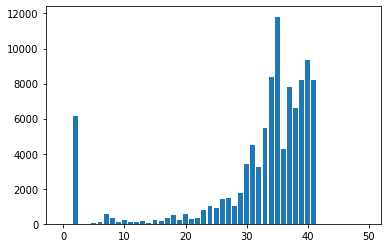

In [18]:
creatHist(qua)

In [19]:
def findGCbyPosition(reads):
    gc = [0] * 100
    totals = [0] * 100

    for read in reads:
        for i in range(len(read)):
            if read[i] == 'C' or read[i] == 'G':
                gc[i] += 1
            totals[i] += 1
    
    for i in range(len(gc)):
        if totals[i] > 0:
            gc[i] /= float(totals[i])
    plt.plot(range(len(gc)),gc)
    plt.show()



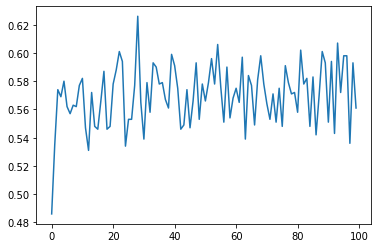

In [20]:
findGCbyPosition(seq)

In [21]:
def countBase(sequences):
    count = collections.Counter()
    for seq in sequences:
        count.update(seq)
    return count

countBase(seq)

Counter({'T': 21836, 'A': 21132, 'C': 28272, 'G': 28742, 'N': 18})

#### Naieve Exact Matching Algorithm

In [22]:
!wget http://d28rh4a8wq0iu5.cloudfront.net/ads1/data/phix.fa

--2022-02-02 01:25:57--  http://d28rh4a8wq0iu5.cloudfront.net/ads1/data/phix.fa
Resolving d28rh4a8wq0iu5.cloudfront.net (d28rh4a8wq0iu5.cloudfront.net)... 54.230.222.21, 54.230.222.194, 54.230.222.139, ...
Connecting to d28rh4a8wq0iu5.cloudfront.net (d28rh4a8wq0iu5.cloudfront.net)|54.230.222.21|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 5528 (5.4K) [application/octet-stream]
Saving to: ‘phix.fa.1’

phix.fa.1           100%[===================>]   5.40K  --.-KB/s    in 0s      

2022-02-02 01:25:58 (99.5 MB/s) - ‘phix.fa.1’ saved [5528/5528]



In [23]:
genome = readGenome('phix.fa')

In [24]:
def naive(pattern,genome):
    occurrences = []
    for i in range(len(genome) - len(pattern) + 1):
        match = True
        for j in range(len(pattern)):
            if genome[i + j] != pattern[j]:
                match = False
                break
        if match :
            occurrences.append(i)

    return occurrences

In [25]:
import random

def generateRead(genome, numReads, readLen):

    read = []

    for _ in range(numReads):
        start = random.randint(0,len(genome) - readLen) - 1
        read.append(genome[start:start + readLen])
    return read


In [26]:
reads = generateRead(genome,100,100)

numMatch = 0
for read in reads:
    matches = naive(read,genome)
    if len(matches) > 0:
        numMatch += 1

print('%d out of %d matched exactly.' %(numMatch,len(reads)))


100 out of 100 matched exactly.


In [27]:
!wget http://d28rh4a8wq0iu5.cloudfront.net/ads1/data/ERR266411_1.first1000.fastq

--2022-02-02 01:25:58--  http://d28rh4a8wq0iu5.cloudfront.net/ads1/data/ERR266411_1.first1000.fastq
Resolving d28rh4a8wq0iu5.cloudfront.net (d28rh4a8wq0iu5.cloudfront.net)... 54.230.222.21, 54.230.222.194, 54.230.222.139, ...
Connecting to d28rh4a8wq0iu5.cloudfront.net (d28rh4a8wq0iu5.cloudfront.net)|54.230.222.21|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 254384 (248K) [audio/mpeg]
Saving to: ‘ERR266411_1.first1000.fastq.1’

ERR266411_1.first10 100%[===================>] 248.42K  --.-KB/s    in 0.02s   

2022-02-02 01:25:58 (10.9 MB/s) - ‘ERR266411_1.first1000.fastq.1’ saved [254384/254384]



In [28]:
phiX_reads , _ = readFastQ('ERR266411_1.first1000.fastq')

In [29]:
numMatch = 0
n = 0
for read in phiX_reads:
    read = read[:30]
    matches = naive(read,genome)
    n += 1
    if len(matches) > 0:
        numMatch += 1

print('%d out of %d matched exactly.' %(numMatch,n))

459 out of 1000 matched exactly.


In [39]:
numMatch = 0
n = 0
for read in phiX_reads:
    read = read[:30]
    matches = naive(read,genome)
    comp_matches = naive(reverseComplement(str(read)),genome)
    tot_matches = matches + comp_matches
    n += 1
    if len(tot_matches) > 0:
        numMatch += 1

print('%d out of %d matched exactly.' %(numMatch,n))

932 out of 1000 matched exactly.
